In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from scipy.integrate import solve_ivp

from sir_model import *

# Task 5

Reproduction number R0= 0.9956709956709958
Globally asymptotically stable if beta <=d+nu+mu0. This is False


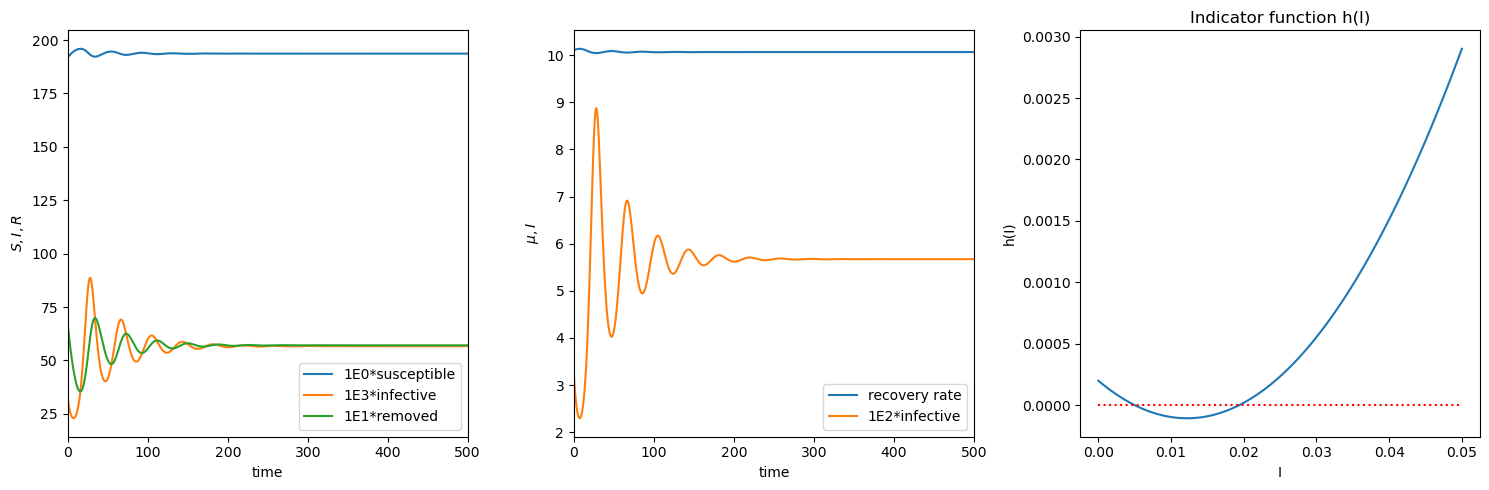

In [2]:
# parameters
random_state = 12345
t_0 = 0
t_end = 10000
NT = t_end-t_0
# if these error tolerances are set too high, the solution will be qualitatively (!) wrong
rtol=1e-8
atol=1e-8

# SIR model parameters
beta=11.5
A=20
d=0.1
nu=1
b=0.01 # try to set this to 0.01, 0.020, ..., 0.022, ..., 0.03
mu0 = 10   # minimum recovery rate
mu1 = 10.45  # maximum recovery rate

# information
print("Reproduction number R0=", R0(beta, d, nu, mu1))
print('Globally asymptotically stable if beta <=d+nu+mu0. This is', beta <= d+nu+mu0)

# simulation
rng = np.random.default_rng(random_state)

SIM0 = rng.uniform(low=(190, 0, 1), high=(199,0.1,8), size=(3,))

time = np.linspace(t_0,t_end,NT)
sol = solve_ivp(model, t_span=[time[0],time[-1]], y0=SIM0, t_eval=time, args=(mu0, mu1, beta, A, d, nu, b), method='LSODA', rtol=rtol, atol=atol)

fig,ax = plt.subplots(1,3,figsize=(15,5))
ax[0].plot(sol.t, sol.y[0]-0*sol.y[0][0], label='1E0*susceptible');
ax[0].plot(sol.t, 1e3*sol.y[1]-0*sol.y[1][0], label='1E3*infective');
ax[0].plot(sol.t, 1e1*sol.y[2]-0*sol.y[2][0], label='1E1*removed');
ax[0].set_xlim([0, 500])
ax[0].legend();
ax[0].set_xlabel("time")
ax[0].set_ylabel(r"$S,I,R$")

ax[1].plot(sol.t, mu(b, sol.y[1], mu0, mu1), label='recovery rate')
ax[1].plot(sol.t, 1e2*sol.y[1], label='1E2*infective');
ax[1].set_xlim([0, 500])
ax[1].legend();
ax[1].set_xlabel("time")
ax[1].set_ylabel(r"$\mu,I$")

I_h = np.linspace(-0.,0.05,100)
ax[2].plot(I_h, h(I_h, mu0, mu1, beta, A, d, nu, b));
ax[2].plot(I_h, 0*I_h, 'r:')
#ax[2].set_ylim([-0.1,0.05])
ax[2].set_title("Indicator function h(I)")
ax[2].set_xlabel("I")
ax[2].set_ylabel("h(I)")

fig.tight_layout()

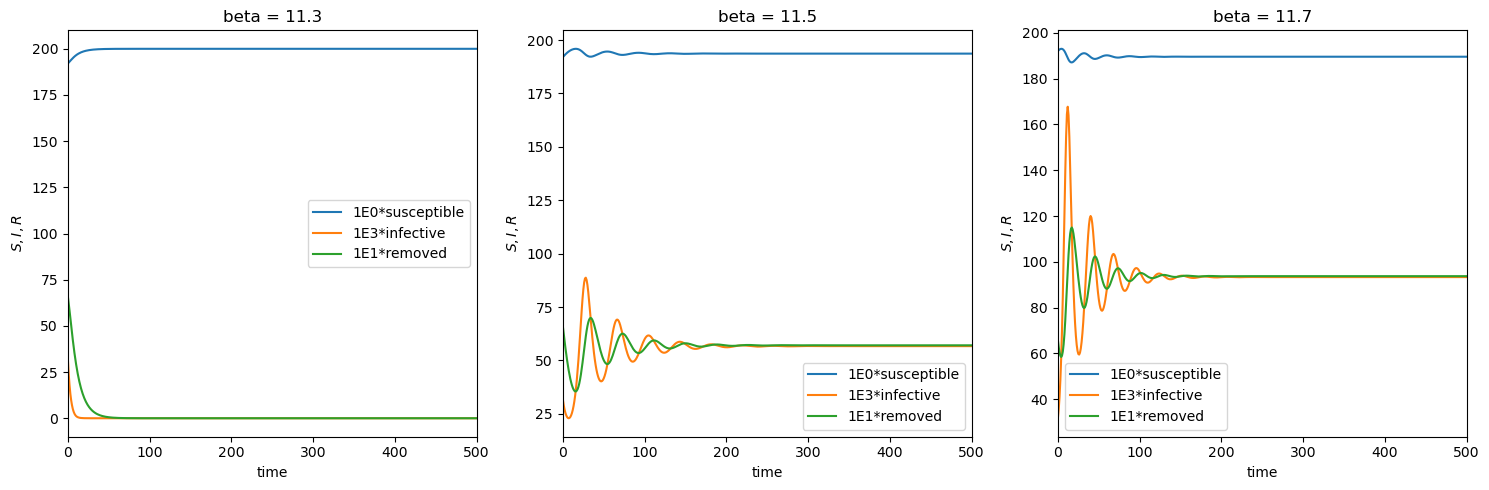

In [3]:
rng = np.random.default_rng(random_state)
SIM0 = rng.uniform(low=(190, 0, 1), high=(199, 0.1, 8), size=(3,))

beta_values = [11.3, 11.5, 11.7]

fig, ax = plt.subplots(1, 3, figsize=(15, 5))

for i, beta in enumerate(beta_values):
    time = np.linspace(t_0, t_end, NT)
    sol = solve_ivp(model, t_span=[time[0], time[-1]], y0=SIM0, t_eval=time, args=(mu0, mu1, beta, A, d, nu, b), method='LSODA', rtol=rtol, atol=atol)
    
    ax[i].plot(sol.t, sol.y[0], label='1E0*susceptible')
    ax[i].plot(sol.t, 1e3 * sol.y[1], label='1E3*infective')
    ax[i].plot(sol.t, 1e1 * sol.y[2], label='1E1*removed')
    ax[i].set_xlim([0, 500])
    ax[i].legend()
    ax[i].set_xlabel("time")
    ax[i].set_ylabel(r"$S,I,R$")
    ax[i].set_title(f'beta = {beta}')
    
fig.tight_layout()
plt.show()

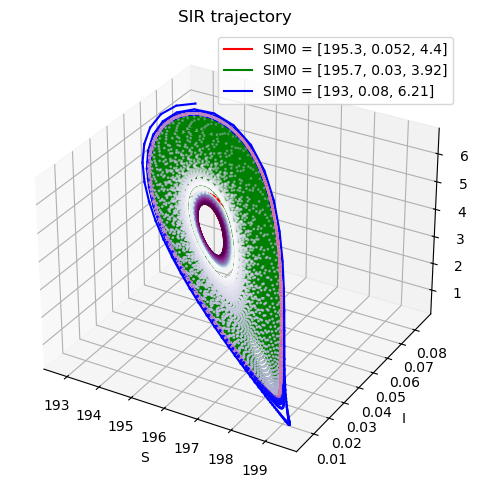

In [4]:
fig=plt.figure(figsize=(5,5))
ax=fig.add_subplot(111,projection="3d")
time = np.linspace(t_0,15000,NT)
beta = 11.5
b = 0.022
cmap = ["BuPu", "Purples", "bwr"][1]
colors = ['red', 'green', 'blue']

SIM0 = [195.3, 0.052, 4.4] # what happens with this initial condition when b=0.022? -- it progresses VERY slowly. Needs t_end to be super large.
sol = solve_ivp(model, t_span=[time[0],time[-1]], y0=SIM0, t_eval=time, args=(mu0, mu1, beta, A, d, nu, b), method='DOP853', rtol=rtol, atol=atol)
ax.plot(sol.y[0], sol.y[1], sol.y[2], 'r-');
ax.plot(sol.y[0], sol.y[1], sol.y[2], color=colors[0], label=f'SIM0 = {SIM0}')
ax.scatter(sol.y[0], sol.y[1], sol.y[2], s=1, c=time, cmap='BuPu');

SIM0 = [195.7, 0.03, 3.92] # what happens with this initial condition when b=0.022?
sol = solve_ivp(model, t_span=[time[0],time[-1]], y0=SIM0, t_eval=time, args=(mu0, mu1, beta, A, d, nu, b), method='DOP853', rtol=rtol, atol=atol)
ax.plot(sol.y[0], sol.y[1], sol.y[2], color=colors[1], label=f'SIM0 = {SIM0}')
ax.scatter(sol.y[0], sol.y[1], sol.y[2], s=1, c=time, cmap='Purples');

SIM0 = [193, 0.08, 6.21] # what happens with this initial condition when b=0.022?
sol = solve_ivp(model, t_span=[time[0],time[-1]], y0=SIM0, t_eval=time, args=(mu0, mu1, beta, A, d, nu, b), method='DOP853', rtol=rtol, atol=atol)
ax.plot(sol.y[0], sol.y[1], sol.y[2], color=colors[2], label=f'SIM0 = {SIM0}')
ax.scatter(sol.y[0], sol.y[1], sol.y[2], s=1, c=time, cmap='bwr');

ax.set_xlabel("S")
ax.set_ylabel("I")
ax.set_zlabel("R")

ax.set_title("SIR trajectory") 
ax.legend()
fig.tight_layout()

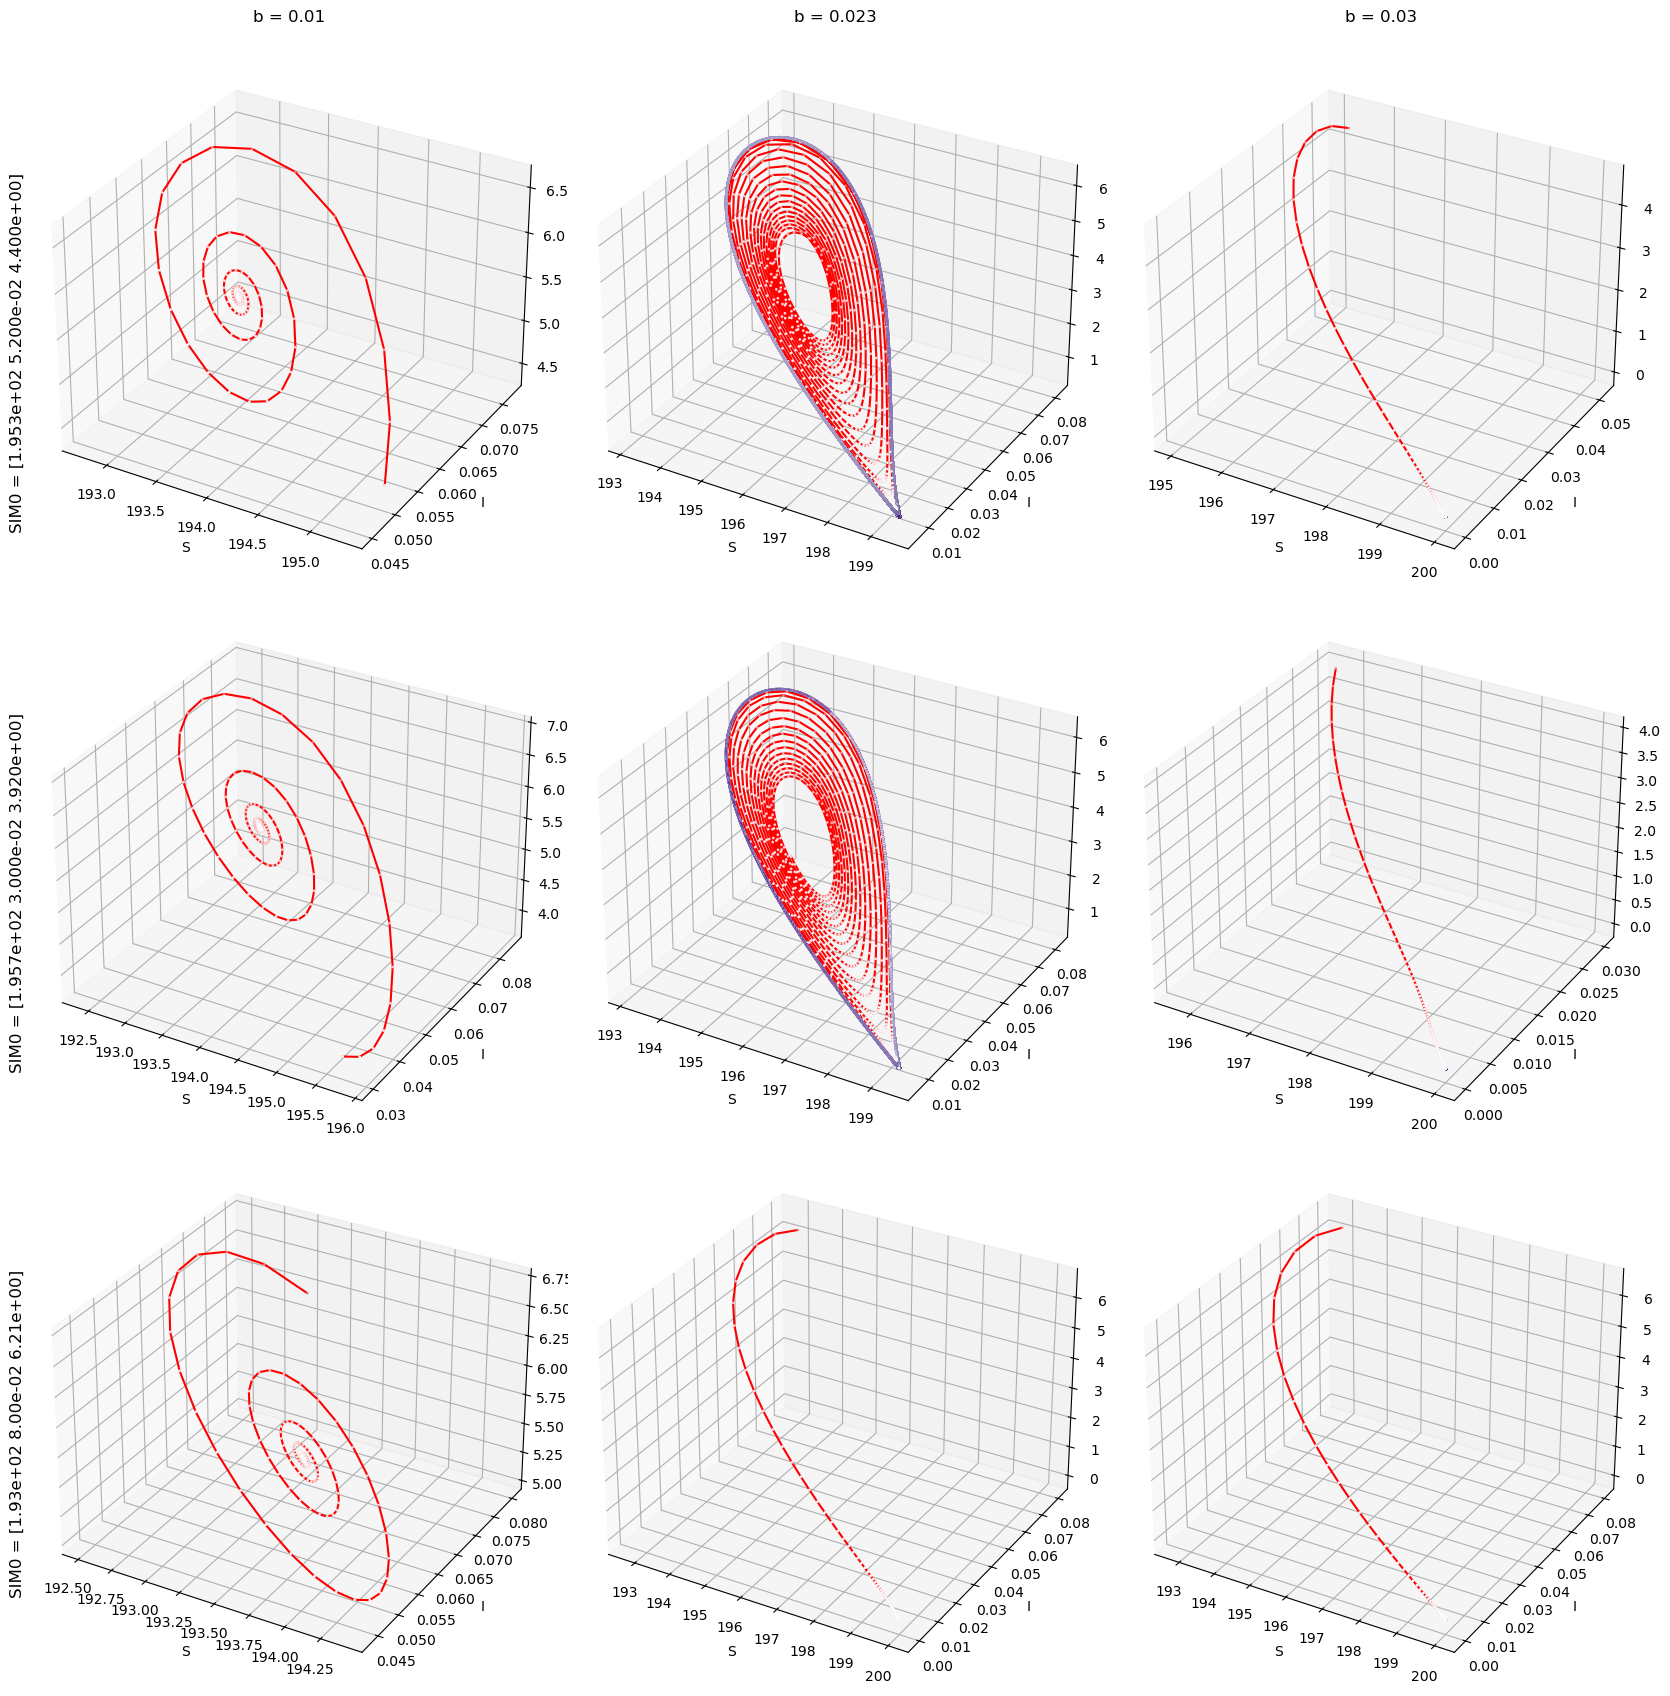

In [6]:
barray = np.array([0.010, 0.023, 0.030])
SIMarray = np.array([[195.3, 0.052, 4.4], [195.7, 0.03, 3.92], [193, 0.08, 6.21]])

cmap = ["BuPu", "Purples", "bwr"][1]

fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(18, 18), subplot_kw={'projection': '3d'})
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i in range(3):
    SIM0 = SIMarray[i]
    if i == 0:
        time = np.linspace(t_0, 100000, 5*NT)
    else:
        time = np.linspace(t_0, 30000, 2*NT)
        
    for j in range(3):
        b = barray[j]
        sol = solve_ivp(model, t_span=[time[0], time[-1]], y0=SIM0, t_eval=time, 
                        args=(mu0, mu1, beta, A, d, nu, b), method='DOP853', rtol=rtol, atol=atol)
        ax[i, j].plot(sol.y[0], sol.y[1], sol.y[2], 'r-')
        scatter = ax[i, j].scatter(sol.y[0], sol.y[1], sol.y[2], s=1, c=time, cmap=cmap)
        
        ax[i, j].set_xlabel("S")
        ax[i, j].set_ylabel("I")
        ax[i, j].set_zlabel("R")
        
for j, b in enumerate(barray):
    ax[0, j].set_title(f"b = {b}", pad=20)

for i, SIM0 in enumerate(SIMarray):
    fig.text(0.04, 0.75- i * 0.3, f"SIM0 = {SIM0}", ha='right', va='center', rotation='vertical', fontsize=12)
    
fig.tight_layout(rect=[0.03, 0, 0.95, 0.95])
plt.show()

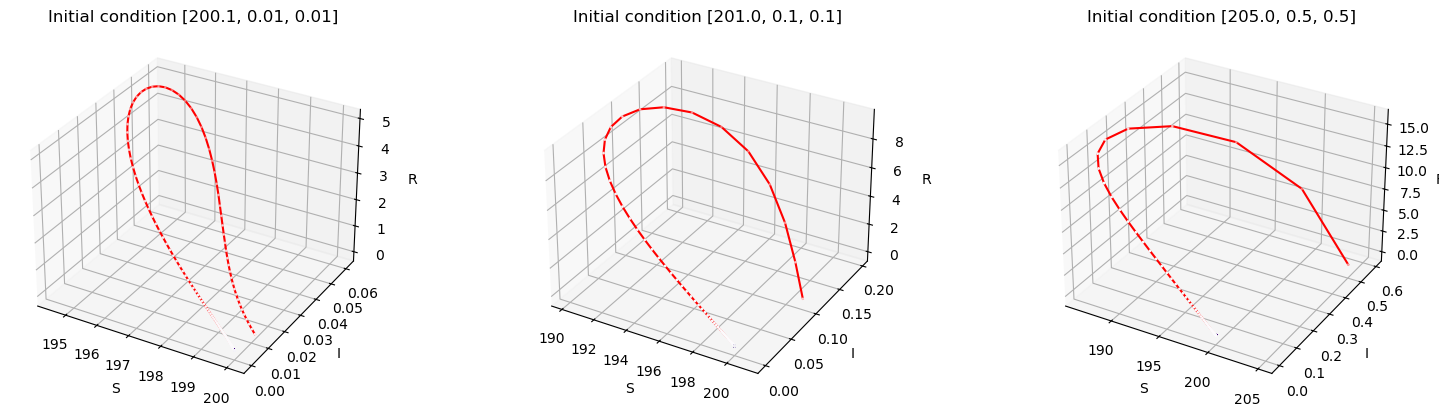

In [7]:
E0 = [A/d, 0, 0]

time = np.linspace(t_0, t_end, NT)

initial_conditions = [
    [E0[0] + 0.1, E0[1] + 0.01, E0[2] + 0.01],
    [E0[0] + 1, E0[1] + 0.1, E0[2] + 0.1],
    [E0[0] + 5, E0[1] + 0.5, E0[2] + 0.5]
]

cmap = ["BuPu", "Purples", "bwr"][1]

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(18, 5), subplot_kw={'projection': '3d'})
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i, SIM0 in enumerate(initial_conditions):
    sol = solve_ivp(model, t_span=[time[0], time[-1]], y0=SIM0, t_eval=time, 
                    args=(mu0, mu1, beta, A, d, nu, b), method='DOP853', rtol=rtol, atol=atol)
    ax[i].plot(sol.y[0], sol.y[1], sol.y[2], 'r-')
    scatter = ax[i].scatter(sol.y[0], sol.y[1], sol.y[2], s=1, c=time, cmap=cmap)
    
    ax[i].set_xlabel("S")
    ax[i].set_ylabel("I")
    ax[i].set_zlabel("R")
    
    ax[i].set_title(f"Initial condition {SIM0}")

plt.show()

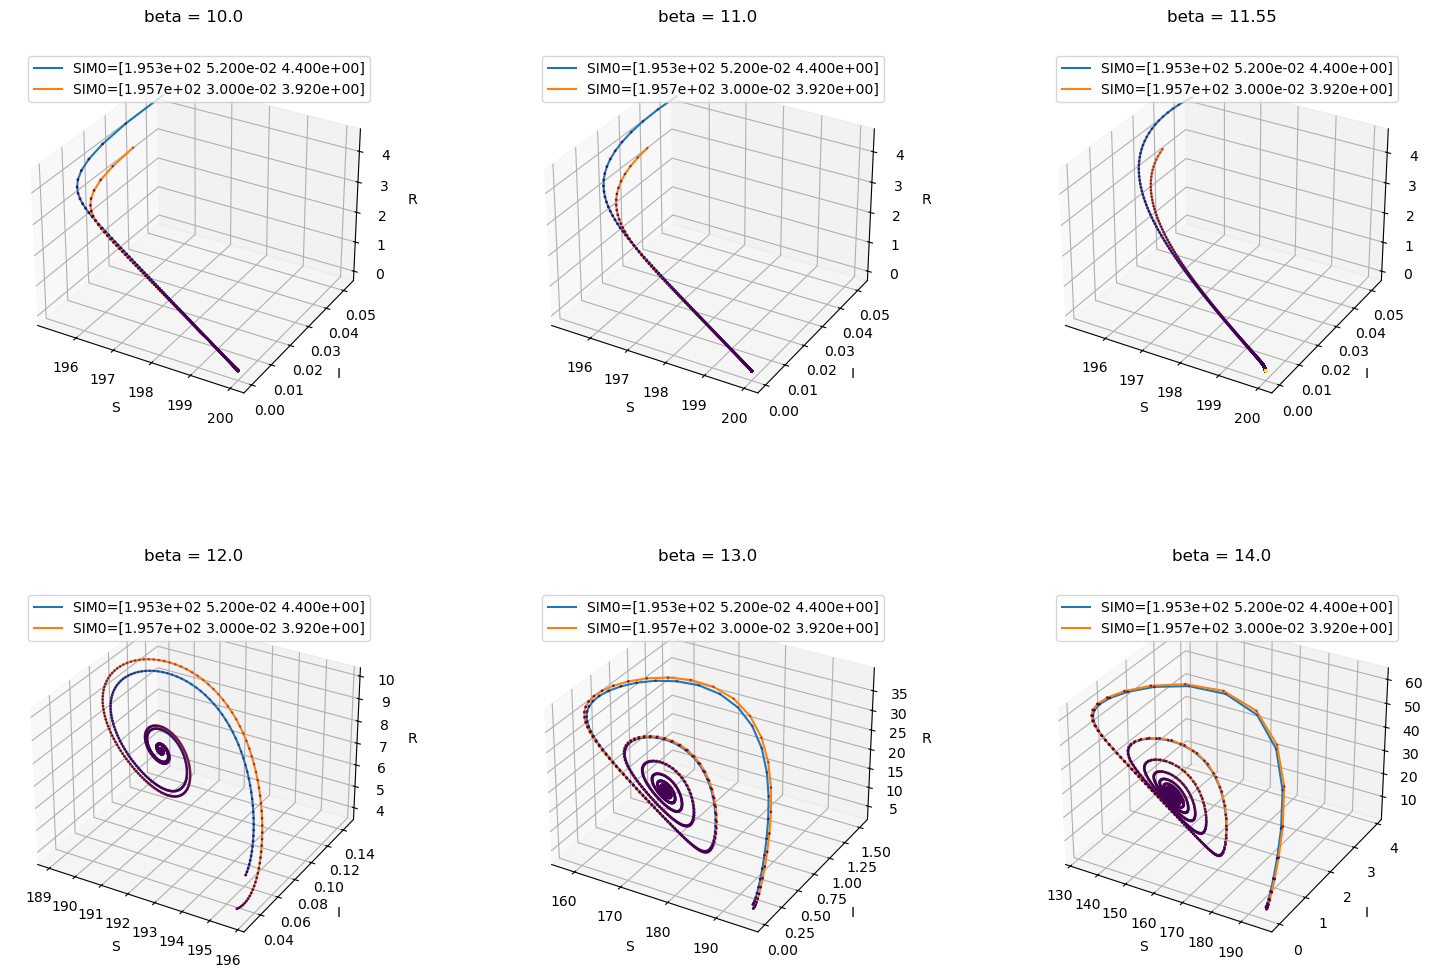

In [9]:
beta_array = np.array([10, 11, 11.55, 12, 13, 14])
SIMarray = np.array([[195.3, 0.052, 4.4], [195.7, 0.03, 3.92]])
b = 1.5
cmap = "viridis"
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(18, 12), subplot_kw={'projection': '3d'})
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i in range(2):
    for j in range(3):
        beta = beta_array[i * 3 + j]
        # b = A * (mu1 - mu0) / (beta * (beta - nu))
        for SIM0 in SIMarray:
            time = np.linspace(t_0, 50000, 20*NT)
            sol = solve_ivp(model, t_span=[time[0], time[-1]], y0=SIM0, t_eval=time, 
                            args=(mu0, mu1, beta, A, d, nu, b), method='DOP853', rtol=rtol, atol=atol)
            ax[i, j].plot(sol.y[0], sol.y[1], sol.y[2], label=f"SIM0={SIM0}")
            scatter = ax[i, j].scatter(sol.y[0], sol.y[1], sol.y[2], s=1, c=time, cmap=cmap)
        
        ax[i, j].set_xlabel("S")
        ax[i, j].set_ylabel("I")
        ax[i, j].set_zlabel("R")
        ax[i, j].set_title(f"beta = {beta}", pad=20)
        ax[i, j].legend()

plt.show()